In [0]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data set을 로드함
can = load_breast_cancer() #load cancer data
print(can.data.shape, can.target.shape)

(569, 30) (569,)


Text(0, 0.5, 'value')

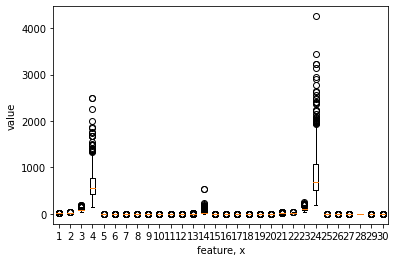

In [3]:
plt.boxplot(can.data)
plt.xlabel("feature, x")
plt.ylabel("value")

4, 24, 14 feature is about area

In [4]:
# find unique sample, for this example, 0 or 1 타겟의 특징과 분포를 unique함수를 통해서 알 수 있음
np.unique(can.target, return_counts=True)

(array([0, 1]), array([212, 357]))

In [0]:
xdata = can.data
ydata = can.target

In [0]:
# seperating datasets to testsets and training set 훈련셋과 테스트셋을 나눔
from sklearn.model_selection import train_test_split

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, stratify=ydata, test_size=0.2, random_state=42)

In [8]:
print(xtrain.shape, xtest.shape)
print(np.unique(ytrain, return_counts=True))

(455, 30) (114, 30)
(array([0, 1]), array([170, 285]))


In [0]:
# make logistic regression

class Logistic:
    def __init_ (self):
        self.w = None
        self.b = None
        # 미리 초기화하지 않는다.

    def forpass(self, x):
        z = np.sum( x * self.w) + self.b # linear equation
        return z
    
    def backprop(self, x, err): # 오차 역전파를 위한 gradiant 를 구하기
        w_grad = x * err 
        b_grad = 1 * err
        return w_grad, b_grad

    def fit (self, x, y, epochs =100):
        self.w = np.ones(x.shape[1]) # 가중치를 1로 초기화
        self.b = 0
        for i in range(epochs):
            for xi, yi in zip(x, y):
                z = self.forpass(xi)
                yhat = self.activation(z) # after actuvation function
                err = - (yi - yhat)
                wgrad, bgrad = self.backprop(xi, err)
                self.w -= wgrad
                self.b -= bgrad

    def activation(self, z):
        #sigmoid function
        a = 1 / (1+ np.exp(-z))
        return a

    def predict(self, x):
        z = [self.forpass(xi) for xi in x] # every x data in
        a = self.activation(np.array(z)) # or np.array(z)
        return a > 0.5 # if a>0.5 True


In [13]:
new = Logistic()
new.fit(xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in exp


In [14]:
np.mean(new.predict(xtest) == ytest) # evaluate model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in exp


0.8245614035087719

In [0]:
# single layer class

class Singlelayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = [] # save lose works

    def forpass(self, x):        
        z = np.sum(x* self.w) + self.b # linear equation       
        return z        

    def backprop(self, x, err): # 오차         
        w_grad = x * err         
        b_grad = err        
        return w_grad, b_grad
             
    def fit (self, x, y, epochs =100):        
        self.w = np.ones(x.shape[1]) # initialize weight        
        self.b = 0        
        for i in range(epochs):            
            loss = 0
            index = np.random.permutation(np.arange(len(x)))
            for j in index:
                z = self.forpass(x[i])                
                yhat = self.activation(z) # after actuvation function                
                err = - (y[i] - yhat)                
                wgrad , bgrad = self.backprop(x[i], err)
                self.w -= wgrad
                self.b -= bgrad
                # log clipping
                yhat = np.clip(yhat, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(yhat) + (1-y[i])*np.log(1-yhat)) # save average loss function
            self.losses.append(loss/len(y))
                  
    
    def activation(self, z):        #sigmoid function        
        a = 1 / (1+ np.exp(-z))        
        return a     
    
    def predict(self, x):        
        z = [self.forpass(xi) for xi in x] # every x data in        
        a = self.activation(z[0]) # or np.array(z)        
        return a > 0.5 # if a>0.5 True

    def score(self, x,y):
        return np.mean(self.predict(x) == y)

In [16]:
layer = Singlelayer()
layer.fit(xtrain, ytrain)
layer.score(xtest, ytest)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in exp


0.3684210526315789

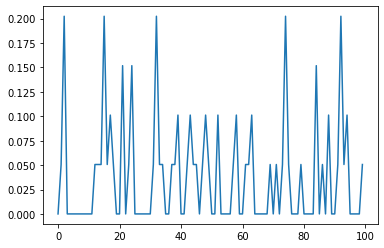

In [17]:
plt.plot(layer.losses)

In [0]:
# sklearn에서 로지스틱 회귀를 가져오기
from sklearn.linear_model import SGDClassifier

In [0]:
sdg = SGDClassifier(loss='log',max_iter=100) # 사이킷런의 로지스틱 회귀모델

In [0]:
sdg.fit(xtrain, ytrain)
s = sdg.predict(xtest)

In [23]:
np.mean(s == ytest)

0.9298245614035088